In [1]:
import seaborn as sns
import pandas as pd

## 1. Carga de Datos

In [2]:
ventas_df = pd.read_csv('dataset_ventas.csv')
ventas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Fecha           20000 non-null  object
 1   Vendedor        20000 non-null  object
 2   Región          20000 non-null  object
 3   Producto        20000 non-null  object
 4   Unidades        20000 non-null  int64 
 5   PrecioUnitario  20000 non-null  int64 
 6   TotalVenta      20000 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 1.1+ MB


In [3]:
ventas_df.head()

,Fecha,Vendedor,Región,Producto,Unidades,PrecioUnitario,TotalVenta
0,2024-01-01,María,Este,Laptop,20,2175,43500
1,2024-01-02,Lucía,Norte,Impresora,15,715,10725
2,2024-01-03,Ana,Este,Smartphone,18,476,8568
3,2024-01-04,Ana,Centro,Monitor,44,185,8140
4,2024-01-05,Jorge,Norte,Tablet,40,1420,56800


## 2. Visualización Inicial

Numero de unidades por venta y que productos son esas unidades


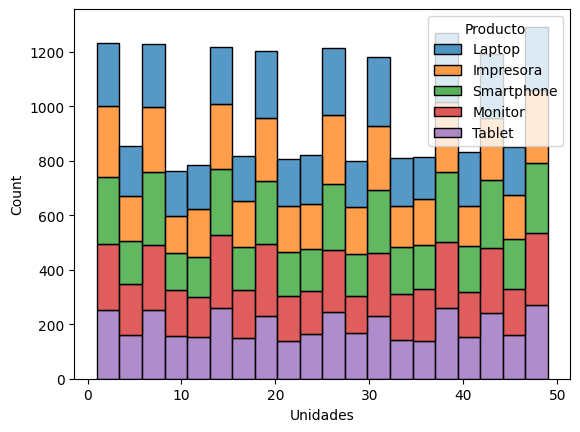

In [4]:
print("Numero de unidades por venta y que productos son esas unidades")
sns.histplot(data=ventas_df, x='Unidades', bins=20, hue='Producto', multiple='stack'
             );

## 3. Gráficos Estadísticos Varidados

### Ventas Por Región del Año 2024
**Graficos de Lineas Comparando totak de ventas por region en 2024**

In [5]:
ventas_df['MesPeriodo'] = [pd.Period(fs, 'M') for fs in ventas_df.Fecha]
ventas_df

,Fecha,Vendedor,Región,Producto,Unidades,PrecioUnitario,TotalVenta,MesPeriodo
0,2024-01-01,María,Este,Laptop,20,2175,43500,2024-01
1,2024-01-02,Lucía,Norte,Impresora,15,715,10725,2024-01
2,2024-01-03,Ana,Este,Smartphone,18,476,8568,2024-01
3,2024-01-04,Ana,Centro,Monitor,44,185,8140,2024-01
4,2024-01-05,Jorge,Norte,Tablet,40,1420,56800,2024-01
...,...,...,...,...,...,...,...,...
19995,2078-09-29,Lucía,Este,Smartphone,8,1243,9944,2078-09
19996,2078-09-30,Ana,Norte,Smartphone,13,1579,20527,2078-09
19997,2078-10-01,Pedro,Oeste,Smartphone,19,1004,19076,2078-10
19998,2078-10-02,María,Oeste,Laptop,5,978,4890,2078-10


In [6]:
ventas_por_periodo = ventas_df.groupby(by=['MesPeriodo', 'Región']).TotalVenta.sum().to_frame().reset_index()
ventas_por_periodo

,MesPeriodo,Región,TotalVenta
0,2024-01,Centro,132747
1,2024-01,Este,194465
2,2024-01,Norte,216803
3,2024-01,Oeste,213992
4,2024-01,Sur,518461
...,...,...,...
3276,2078-09,Este,156308
3277,2078-09,Norte,120453
3278,2078-09,Oeste,228281
3279,2078-09,Sur,94054


In [12]:

lim_sup = pd.Period('2025-01-01', 'M')
lim_inf = pd.Period('2024-01-01', 'M')
ventas_2024 = ventas_por_periodo[(ventas_por_periodo.MesPeriodo >= lim_inf) & (ventas_por_periodo.MesPeriodo < lim_sup)]
ventas_2024['MesPeriodo_'] = [f.to_timestamp() for f in ventas_2024['MesPeriodo']]


/tmp/ipykernel_11201/173521530.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ventas_2024['MesPeriodo_'] = [f.to_timestamp() for f in ventas_2024['MesPeriodo']]


<Axes: xlabel='MesPeriodo_', ylabel='TotalVenta'>

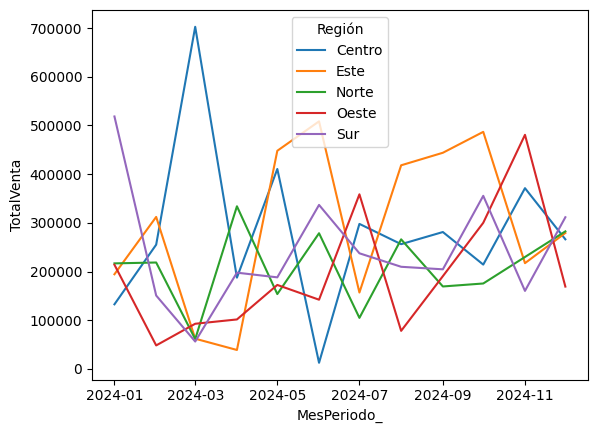

In [8]:
sns.lineplot(data=ventas_2024, x='MesPeriodo_', y='TotalVenta', hue='Región')

### Gráfico de barras comparando categorías

#### Ventas segun el tipo de Prodcuto y histograma de precios vendidos


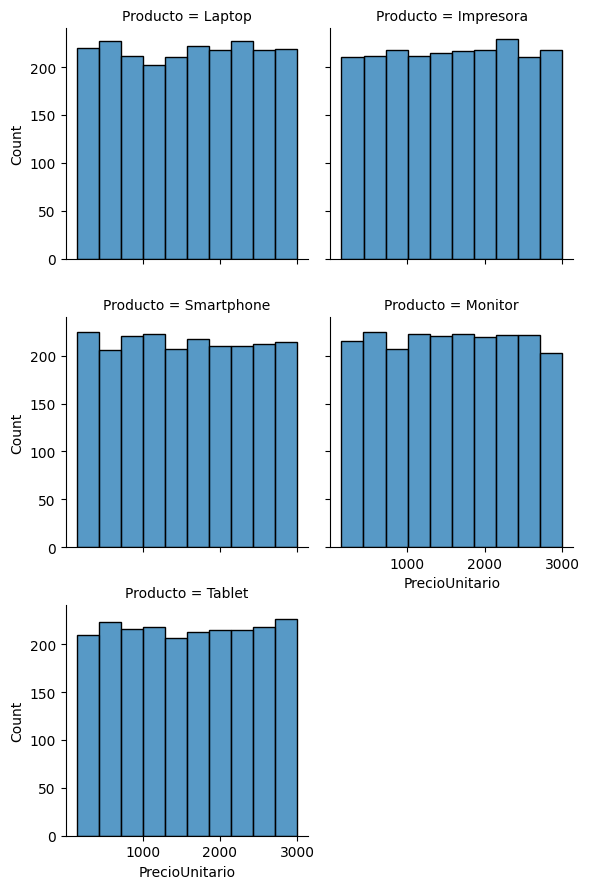

In [40]:
# Filtrar para tener precios únicos por producto
precios_unicos = ventas_df.drop_duplicates(subset=["Producto", "PrecioUnitario"])

# Crear FacetGrid
g = sns.FacetGrid(precios_unicos, col="Producto", col_wrap=2, height=3)
g.map(sns.histplot, "PrecioUnitario", bins=10)
g.savefig('grafico-barras.pdf')




#### Ventas Por Region Comparando el Total de Venta entre Productos

In [13]:
ventas_por_region = ventas_df.groupby(by=['Región','Producto']).TotalVenta.sum().to_frame()


<Axes: xlabel='Región', ylabel='TotalVenta'>

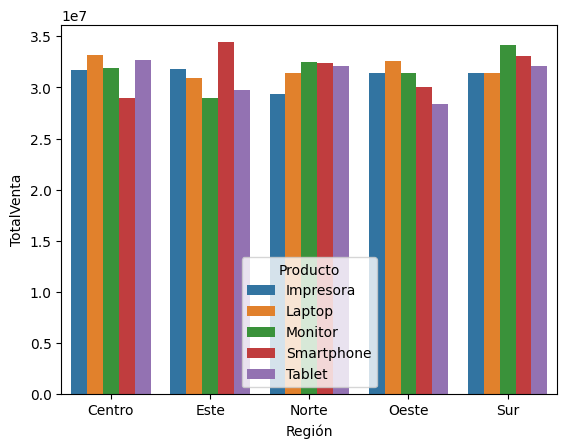

In [11]:
sns.barplot(data=ventas_por_region, y='TotalVenta', x='Región', hue='Producto')

### Grafico de Dispersion comparando ventas en distintas regiones en 2024

In [41]:
ventas_df['Mes_ord'] = pd.to_datetime(ventas_df.Fecha).dt.month 
ventas_por_numero_mes = ventas_df.groupby(by=['Mes_ord', 'Producto']).Unidades.sum().reset_index()


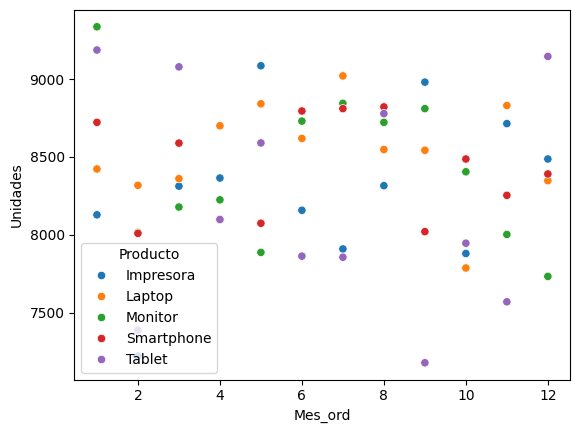

In [36]:
scatter = sns.scatterplot(data=ventas_por_numero_mes, x='Mes_ord', y='Unidades', hue='Producto')
scatter.get_figure().savefig('grafico-dispersion.png')

# Informe

No se observa ninguna tendencia en los datos de ventas. Además, todo indica que estos datos han sido generados artificialmente mediante métodos aleatorios.